# **Set Operations on Datasets**

In any data analysis process, most likely, we will be working with more than one dataset.

It is handy to combine those datasets in different ways.

Using Python, we can perform different types of combinations to gain more insights into the resulting dataset. 

An important subset of those combinations is `Set operations`.

## **Set Operations**

Set operations are the mathematical operations that are used for comparison purposes.

Let's use the image below to undrstand some of those operations 

![title](img/set-operations.png)


## **Let's play around with set operations and different datasets**

### **Prepare datasets**

In [108]:
import locussdk as locus
import pandas as pd 
import numpy as np 
import plotly.express as px 
from datetime import datetime, timedelta
import seaborn as sns 
import matplotlib.pyplot as plt 

We will be using Popular Times V2 to create different audiences and compare them to each other.


#### Get POIs

First, we need to define the POI lists we will be comparing. 

Let's check the available global POI lists.

In [7]:
avail_pois = locus.get_avail_poi_lists('global')

In [8]:
avail_pois.head()

,name,poi_list_id,whitelabelid,customerid
0,Second Cup Canada,2,None,None
1,McDonalds,3,None,None
2,Tim Hortons,4,None,None
3,Xtracash,7,None,None
4,Overwaiteafoods,8,None,None


In [14]:
avail_pois[avail_pois['name'].isin(['Longos', 'Sobeys', 'Loblaws'])]

,name,poi_list_id,whitelabelid,customerid
199,Longos,204,None,None
225,Loblaws,230,None,None
488,Sobeys,493,None,None


Let's get the POIs for each POI list and get only the POIs located in Ontario.

In [19]:
loblaws_pois = locus.get_pois(230)

In [22]:
loblaws_pois = loblaws_pois[loblaws_pois['region'] == 'ON']

In [23]:
longos_pois = locus.get_pois(204)

In [24]:
longos_pois = longos_pois[longos_pois['region'] == 'ON']

In [25]:
sobeys_pois = locus.get_pois(493)

In [26]:
sobeys_pois = sobeys_pois[sobeys_pois['region'] == 'ON']

#### Generate audiences 

Using the defined POIs, we will get the audiences related to those POIs.

In [28]:
loblaws_audience = locus.get_audience(loblaws_pois, '20210315', 100)

In [30]:
loblaws_audience.head()

,total_counts,deviceIDs,hour,day,HoD,coords,date,id,name,city,region,postalCode,country,addressLabel,lat,lon,chainId
0,1,[JKtJ9rtuocMmDIltGOzA9LjfRzRew9/DdfCyHDLq/PwkG...,00,Monday,00_Monday,"45.4104562, -75.6858988",20210315,47616,Loblaws,Ottawa,ON,K1S 1V4,CA,"64 Isabella Street,Ottawa,ON,K1S 1V4, Canada",45.410456,-75.685899,229
1,1,[JKtJ9rtuocMmDIltGOzA9LjfRzRew9/DdfCyHDLq/PwkG...,01,Monday,01_Monday,"45.4104562, -75.6858988",20210315,47616,Loblaws,Ottawa,ON,K1S 1V4,CA,"64 Isabella Street,Ottawa,ON,K1S 1V4, Canada",45.410456,-75.685899,229
2,1,[JKtJ9rtuocMmDIltGOzA9LjfRzRew9/DdfCyHDLq/PwkG...,02,Monday,02_Monday,"45.4104562, -75.6858988",20210315,47616,Loblaws,Ottawa,ON,K1S 1V4,CA,"64 Isabella Street,Ottawa,ON,K1S 1V4, Canada",45.410456,-75.685899,229
3,1,[JKtJ9rtuocMmDIltGOzA9LjfRzRew9/DdfCyHDLq/PwkG...,03,Monday,03_Monday,"45.4104562, -75.6858988",20210315,47616,Loblaws,Ottawa,ON,K1S 1V4,CA,"64 Isabella Street,Ottawa,ON,K1S 1V4, Canada",45.410456,-75.685899,229
4,1,[JKtJ9rtuocMmDIltGOzA9LjfRzRew9/DdfCyHDLq/PwkG...,04,Monday,04_Monday,"45.4104562, -75.6858988",20210315,47616,Loblaws,Ottawa,ON,K1S 1V4,CA,"64 Isabella Street,Ottawa,ON,K1S 1V4, Canada",45.410456,-75.685899,229


In [32]:
loblaws_audience_2 = locus.get_audience(loblaws_pois, '20210316', 100)

In [33]:
loblaws_audience_2.head()

,total_counts,deviceIDs,hour,day,HoD,coords,date,id,name,city,region,postalCode,country,addressLabel,lat,lon,chainId
0,1,[JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...,05,Tuesday,05_Tuesday,"43.6615135, -79.5197696",20210316,47652,Loblaws,Etobicoke,ON,M9A 3T7,CA,"270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada",43.661513,-79.51977,229
1,1,[JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...,05,Tuesday,05_Tuesday,"43.6615135, -79.5197696",20210316,47652,Loblaws,Etobicoke,ON,M9A 3T7,CA,"270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada",43.661513,-79.51977,229
2,1,[JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...,07,Tuesday,07_Tuesday,"43.6615135, -79.5197696",20210316,47652,Loblaws,Etobicoke,ON,M9A 3T7,CA,"270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada",43.661513,-79.51977,229
3,1,[JKtJ9rtuoZvE9et3YloGccRxggXh7Cayccb5uCPQbaHth...,07,Tuesday,07_Tuesday,"43.6615135, -79.5197696",20210316,47652,Loblaws,Etobicoke,ON,M9A 3T7,CA,"270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada",43.661513,-79.51977,229
4,1,[JKtJ9rtuoZkeav7yZZDG4fDmNCz9eG2tkD6FLiF0K/G81...,08,Tuesday,08_Tuesday,"43.6615135, -79.5197696",20210316,47652,Loblaws,Etobicoke,ON,M9A 3T7,CA,"270 The Kingsway,Etobicoke,ON,M9A 3T7, Canada",43.661513,-79.51977,229


In [34]:
print('First dataset length: ', len(loblaws_audience))
print('Second dataset length: ', len(loblaws_audience_2))

First dataset length:  6098
Second dataset length:  5984


### **Union All datasets**

In [35]:
loblaws_audience_union = pd.concat([loblaws_audience, loblaws_audience_2], ignore_index=True)

In [36]:
print('Union dataset length: ', len(loblaws_audience_union))

Union dataset length:  12082


As the audiences were generated for different days, there is no overlap on the records, and the result will be similar to grabbing the second dataset and placing it below the first one

Automate the union and date generation.

We will be using some the funcitons `datetime` and `timedelta` to work with dates.

In [45]:
date_val = datetime(2020, 12, 25)
date_val

datetime.datetime(2020, 12, 25, 0, 0)

`datetime.strftime` will help us transform a DateTime to a string using the format we are interested in. 

In [48]:
datetime.strftime(date_val, '%Y%m%d')

'20201225'

`datetime.strptime` will help us transform a string to a DateTime object.

In [49]:
date_string = '20201225'

datetime.strptime(date_string, '%Y%m%d')

datetime.datetime(2020, 12, 25, 0, 0)

`timedelta` will help us calculating differences in dates using DateTime object.

In [57]:
datetime(2020, 12, 25) + timedelta(days=1)

datetime.datetime(2020, 12, 26, 0, 0)

In [51]:
## Function to generate dates given and start and end  

def get_dates(start, end):
    
    current = datetime.strptime(start, '%Y%m%d')
    end = datetime.strptime(end, '%Y%m%d')
    dates = []
    while current <= end:
        dates.append(datetime.strftime(current, '%Y%m%d'))
        current = current + timedelta(days=1)
        
    return dates

In [52]:
get_dates('20201225', '20210103')

['20201225',
 '20201226',
 '20201227',
 '20201228',
 '20201229',
 '20201230',
 '20201231',
 '20210101',
 '20210102',
 '20210103']

We will loop over the generated dates and build and audience for each one.

Using concat we will emulate a Union All operation.

In [65]:
start = '20201225'
end = '20210103'

In [54]:
# Loblaws audience 
loblaws_audience = pd.DataFrame()
for date in get_dates(start, end):
    audience = locus.get_audience(loblaws_pois, date, 100)
    loblaws_audience = pd.concat([loblaws_audience, audience], ignore_index=True)

In [60]:
# Longos audience 
longos_audience = pd.DataFrame()
for date in get_dates(start, end):
    audience = locus.get_audience(longos_pois, date, 100)
    longos_audience = pd.concat([longos_audience, audience], ignore_index=True)

In [61]:
# Sobeys audience 
sobeys_audience = pd.DataFrame()
for date in get_dates(start, end):
    audience = locus.get_audience(sobeys_pois, date, 100)
    sobeys_audience = pd.concat([sobeys_audience, audience], ignore_index=True)

In [67]:
loblaws_audience.head()

,total_counts,deviceIDs,hour,day,HoD,coords,date,id,name,city,region,postalCode,country,addressLabel,lat,lon,chainId
0,1,[JKtJ9rtuoclZo1QGZbMp/OgAIZcws9yNa381lO8BrXiJj...,00,Friday,00_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229
1,1,[JKtJ9rtuoclZo1QGZbMp/OgAIZcws9yNa381lO8BrXiJj...,04,Friday,04_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229
2,1,[JKtJ9rtuoZlCg5GGup8rCSlkBZ39Tus1F0/1IBZPTUxqx...,09,Friday,09_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229
3,1,[JKtJ9rtuocheuxOzK0sJlhpe/h7b7xQjzHrHnq0+Os2Wh...,14,Friday,14_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229
4,1,[JKtJ9rtuocheuxOzK0sJlhpe/h7b7xQjzHrHnq0+Os2Wh...,14,Friday,14_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229


As the deviceIDs are inside a list, we will unpack those deviceIDs, so each one will be one record.

In [68]:
loblaws_audience = loblaws_audience.explode('deviceIDs')
loblaws_audience = loblaws_audience.drop(['total_counts'], axis=1)


In [69]:
loblaws_audience.head()

,deviceIDs,hour,day,HoD,coords,date,id,name,city,region,postalCode,country,addressLabel,lat,lon,chainId
0,JKtJ9rtuoclZo1QGZbMp/OgAIZcws9yNa381lO8BrXiJjU...,00,Friday,00_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229
1,JKtJ9rtuoclZo1QGZbMp/OgAIZcws9yNa381lO8BrXiJjU...,04,Friday,04_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229
2,JKtJ9rtuoZlCg5GGup8rCSlkBZ39Tus1F0/1IBZPTUxqxM...,09,Friday,09_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229
3,JKtJ9rtuocheuxOzK0sJlhpe/h7b7xQjzHrHnq0+Os2WhH...,14,Friday,14_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229
4,JKtJ9rtuocheuxOzK0sJlhpe/h7b7xQjzHrHnq0+Os2WhH...,14,Friday,14_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229


In [70]:
longos_audience = longos_audience.explode('deviceIDs')
longos_audience = longos_audience.drop(['total_counts'], axis=1)

sobeys_audience = sobeys_audience.explode('deviceIDs')
sobeys_audience = sobeys_audience.drop(['total_counts'], axis=1)

Using `concat` we can Union All the audiences and check some metrics on those.

In [76]:
loblaws_audience['chain_name'] = 'loblaws'
longos_audience['chain_name'] = 'longos'
sobeys_audience['chain_name'] = 'sobeys'


union_audience = pd.concat([loblaws_audience, longos_audience, sobeys_audience], ignore_index=True)

In [77]:
len(union_audience)

143469

In [78]:
len(union_audience['deviceIDs'].unique())

20266

In [83]:
union_audience.groupby('chain_name').agg({'deviceIDs':['count', 'nunique']})

deviceIDs        
               count nunique
chain_name                  
loblaws        47325    8125
longos         33642    6950
sobeys         62502    9240

In [84]:
union_audience[union_audience['day'] == 'Friday'].groupby('chain_name').agg({'deviceIDs':['count', 'nunique']})

deviceIDs        
               count nunique
chain_name                  
loblaws         5214    1334
longos          3590    1112
sobeys          7441    1506

Thanks to Union All, we are able to make comparisons between datasets.

Or create great visualizations

In [125]:
df_heatmap = union_audience.groupby(['chain_name', 'day', 'hour'], as_index=False).agg({'deviceIDs':'count'})

In [126]:
df_heatmap.head()

,chain_name,day,hour,deviceIDs
0,loblaws,Friday,00,215
1,loblaws,Friday,01,291
2,loblaws,Friday,02,192
3,loblaws,Friday,03,172
4,loblaws,Friday,04,149


In [127]:
df_heatmap['hour'] = pd.Categorical(df_heatmap['hour'],
                                     ordered=True,
                                     categories=["{:02d}".format(x) for x in list(range(24))])
df_heatmap['day'] = pd.Categorical(df_heatmap['day'],
                                     ordered=True,
                                     categories=['Monday','Tuesday','Wednesday',
                                                 'Thursday','Friday','Saturday','Sunday'])

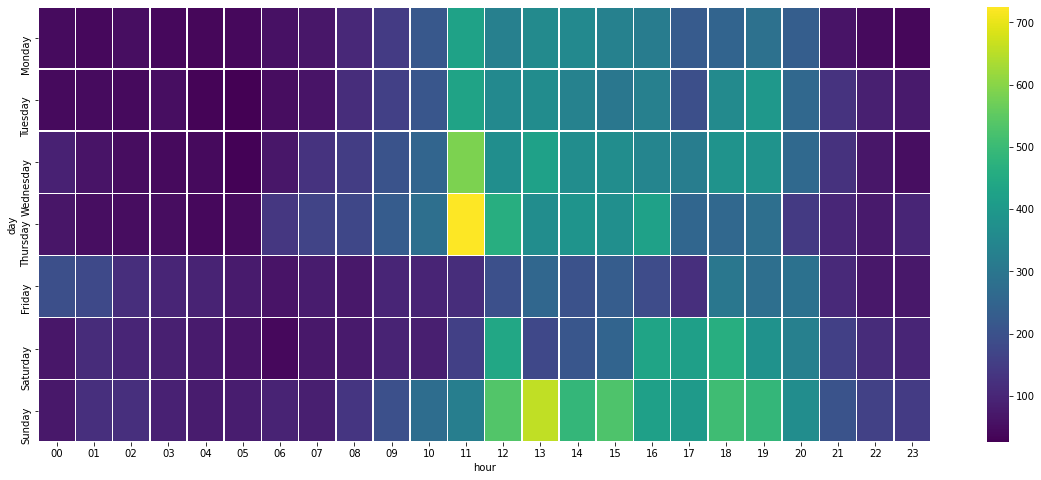

In [134]:
pv = df_heatmap[df_heatmap['chain_name'].isin(['longos'])].pivot_table(index='day',columns='hour',values='deviceIDs')
plt.figure(figsize=(20,8))
sns.heatmap(pv, cmap='viridis', linecolor='white', linewidths='0.5')
plt.show()

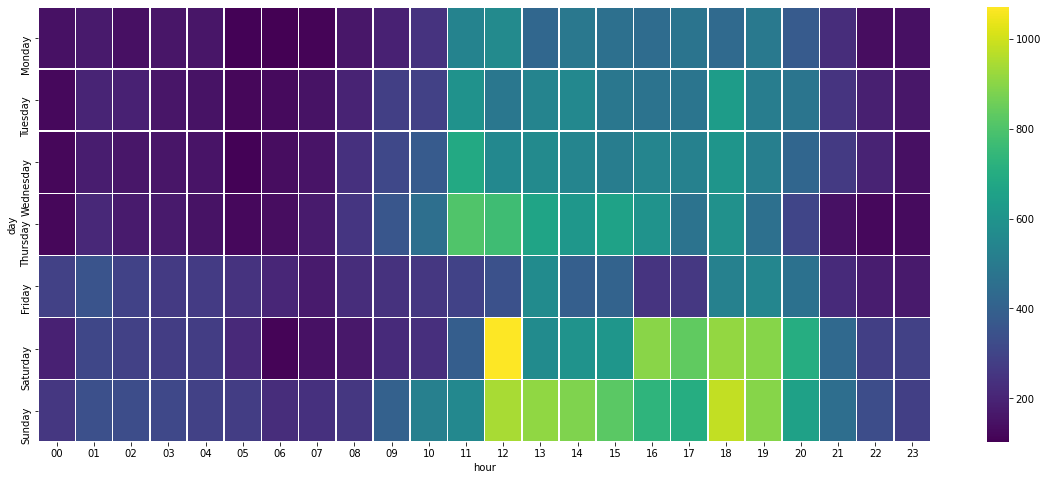

In [132]:
pv = df_heatmap[df_heatmap['chain_name'].isin(['sobeys'])].pivot_table(index='day',columns='hour',values='deviceIDs')
plt.figure(figsize=(20,8))
sns.heatmap(pv, cmap='viridis', linecolor='white', linewidths='0.5')
plt.show()

### **Intersection in datasets**

Get devices that have been in Longos and also in Sobeys.

In [85]:
device_intersection = (np.intersect1d(longos_audience['deviceIDs'], sobeys_audience['deviceIDs']))


In [87]:
xwi_aud = longos_audience[longos_audience['deviceIDs'].isin(device_intersection)]

In [88]:
xwi_aud

,deviceIDs,hour,day,HoD,coords,date,id,name,city,region,postalCode,country,addressLabel,lat,lon,chainId,chain_name
16,JKtJ9rtuoczvuDiKrAXoINok0zZEezZAnQZ1wImuLkV261...,16,Friday,16_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos
17,JKtJ9rtuoczvuDiKrAXoINok0zZEezZAnQZ1wImuLkV261...,16,Friday,16_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos
19,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,19,Friday,19_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos
35,JKtJ9rtuoc9ibnmuX1RC1Y2v7ZEWRPaAAfei7A56gNGts/...,16,Friday,16_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos
36,JKtJ9rtuocJkxYML9xVQTnENm0DACgX3bIOI4RcC4azono...,17,Friday,17_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31488,JKtJ9rtuocsKZBixYTOEgUe55gF9NWG3dARLD4xrZxt0wO...,15,Sunday,15_Sunday,"43.7064544, -79.3595227",20210103,45912,Longos,Toronto,ON,M4G 3V1,CA,"93 Laird Drive,Toronto,ON,M4G 3V1, Canada",43.706454,-79.359523,203,longos
31489,JKtJ9rtuocsKZBixYTOEgUe55gF9NWG3dARLD4xrZxt0wO...,15,Sunday,15_Sunday,"43.7064544, -79.3595227",20210103,45912,Longos,Toronto,ON,M4G 3V1,CA,"93 Laird Drive,Toronto,ON,M4G 3V1, Canada",43.706454,-79.359523,203,longos
31490,JKtJ9rtuoco+YWLDICgXOyDc+8gU7ina6IxTE/IZu0MDVu...,17,Sunday,17_Sunday,"43.7064544, -79.3595227",20210103,45912,Longos,Toronto,ON,M4G 3V1,CA,"93 Laird Drive,Toronto,ON,M4G 3V1, Canada",43.706454,-79.359523,203,longos
31491,JKtJ9rtuoZkcyOwVCU3WUELS7Ty36s3pz8QQtE7iVYeSbg...,14,Sunday,14_Sunday,"43.7064544, -79.3595227",20210103,45912,Longos,Toronto,ON,M4G 3V1,CA,"93 Laird Drive,Toronto,ON,M4G 3V1, Canada",43.706454,-79.359523,203,longos


We could also get all the different combinations of XWI, this means that we will know all the visits combinations between Longos and Sobeys.

In other words, if the device X has been to two locations of Sobeys and also two locations of Longos, we will register 4 different combinations for the device X.

In [94]:
locus.format_table(columns=True)
xwi_report = pd.merge(longos_audience, sobeys_audience, how='inner', on='deviceIDs', suffixes=['_longos', '_sobeys'])

In [95]:
xwi_report

,deviceIDs,hour_longos,day_longos,HoD_longos,coords_longos,date_longos,id_longos,name_longos,city_longos,region_longos,postalCode_longos,country_longos,addressLabel_longos,lat_longos,lon_longos,chainId_longos,chain_name_longos,hour_sobeys,day_sobeys,HoD_sobeys,coords_sobeys,date_sobeys,id_sobeys,name_sobeys,city_sobeys,region_sobeys,postalCode_sobeys,country_sobeys,addressLabel_sobeys,lat_sobeys,lon_sobeys,chainId_sobeys,chain_name_sobeys
0,JKtJ9rtuoczvuDiKrAXoINok0zZEezZAnQZ1wImuLkV261...,16,Friday,16_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos,00,Friday,00_Friday,"43.3953802, -79.7121145",20201225,77604,Sobeys,Oakville,ON,L6L 1H8,CA,"2441 Lakeshore Rd. West, Oakville,Oakville,ONT...",43.395380,-79.712114,492,sobeys
1,JKtJ9rtuoczvuDiKrAXoINok0zZEezZAnQZ1wImuLkV261...,16,Friday,16_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos,00,Friday,00_Friday,"43.3953802, -79.7121145",20201225,77604,Sobeys,Oakville,ON,L6L 1H8,CA,"2441 Lakeshore Rd. West, Oakville,Oakville,ONT...",43.395380,-79.712114,492,sobeys
2,JKtJ9rtuoczvuDiKrAXoINok0zZEezZAnQZ1wImuLkV261...,18,Thursday,18_Thursday,"43.6579128, -79.726188",20201231,45907,Longos,Brampton,ON,L6Y 4M3,CA,"7700 Hurontario Street,Brampton,ON,L6Y 4M3, Ca...",43.657913,-79.726188,203,longos,00,Friday,00_Friday,"43.3953802, -79.7121145",20201225,77604,Sobeys,Oakville,ON,L6L 1H8,CA,"2441 Lakeshore Rd. West, Oakville,Oakville,ONT...",43.395380,-79.712114,492,sobeys
3,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,19,Friday,19_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys
4,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,19,Friday,19_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys
5,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,17,Monday,17_Monday,"43.6424523, -79.3809167",20201228,45915,Longos,Toronto,ON,M5J 0A3,CA,"15 York Street,Toronto,ON,M5J 0A3, Canada",43.642452,-79.380917,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys
6,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,17,Monday,17_Monday,"43.6424523, -79.3809167",20201228,45915,Longos,Toronto,ON,M5J 0A3,CA,"15 York Street,Toronto,ON,M5J 0A3, Canada",43.642452,-79.380917,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys
7,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,22,Monday,22_Monday,"43.6424523, -79.3809167",20201228,45915,Longos,Toronto,ON,M5J 0A3,CA,"15 York Street,Toronto,ON,M5J 0A3, Canada",43.642452,-79.380917,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys
8,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,22,Monday,22_Monday,"43.6424523, -79.3809167",20201228,45915,Longos,Toronto,ON,M5J 0A3,CA,"15 York Street,Toronto,ON,M5J 0A3, Canada",43.642452,-79.380917,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oak

We can create an audience that have walk to Longos first and after that to Sobeys, if the order is something we are interested in. 

In [135]:
xwi_report[xwi_report['date_longos'] < xwi_report['date_sobeys']].head()

,deviceIDs,hour_longos,day_longos,HoD_longos,coords_longos,date_longos,id_longos,name_longos,city_longos,region_longos,postalCode_longos,country_longos,addressLabel_longos,lat_longos,lon_longos,chainId_longos,chain_name_longos,hour_sobeys,day_sobeys,HoD_sobeys,coords_sobeys,date_sobeys,id_sobeys,name_sobeys,city_sobeys,region_sobeys,postalCode_sobeys,country_sobeys,addressLabel_sobeys,lat_sobeys,lon_sobeys,chainId_sobeys,chain_name_sobeys
3,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,19,Friday,19_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys
4,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,19,Friday,19_Friday,"43.4883306, -79.7175424",20201225,45904,Longos,Oakville,ON,L6H 6Z9,CA,"338 Dundas Street East,Oakville,ON,L6H 6Z9, Ca...",43.488331,-79.717542,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys
5,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,17,Monday,17_Monday,"43.6424523, -79.3809167",20201228,45915,Longos,Toronto,ON,M5J 0A3,CA,"15 York Street,Toronto,ON,M5J 0A3, Canada",43.642452,-79.380917,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys
6,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,17,Monday,17_Monday,"43.6424523, -79.3809167",20201228,45915,Longos,Toronto,ON,M5J 0A3,CA,"15 York Street,Toronto,ON,M5J 0A3, Canada",43.642452,-79.380917,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys
7,JKtJ9rtuoZ8LaG9jFEEZ9v74hDnAB1cxY9sXntT8Ze7igQ...,22,Monday,22_Monday,"43.6424523, -79.3809167",20201228,45915,Longos,Toronto,ON,M5J 0A3,CA,"15 York Street,Toronto,ON,M5J 0A3, Canada",43.642452,-79.380917,203,longos,17,Saturday,17_Saturday,"43.4387072, -79.7405356",20210102,77605,Sobeys,Oakville,ON,L6M 3G3,CA,"1500 Upper Middle Road West,Oakville,ONTARIO,L...",43.438707,-79.740536,492,sobeys


If the number of visits would important for our analysis we could include a preprocessing step before performing the Union All

First, we will get the counts per device.

In [161]:
longos_audience_count = longos_audience.groupby(['deviceIDs', 'chain_name'], as_index=False).agg({'chainId':'count'})
longos_audience_count.rename(columns={'chainId': 'visits'}, inplace=True)

In [162]:
sobeys_audience_count = sobeys_audience.groupby(['deviceIDs', 'chain_name'], as_index=False).agg({'chainId':'count'})
sobeys_audience_count.rename(columns={'chainId': 'visits'}, inplace=True)

This time we will make an outer join returning all devices any filling up with null when a device hasn't been to one of either chains.

In [164]:
xwi_report_count = pd.merge(longos_audience_count, sobeys_audience_count, how='outer', on='deviceIDs', suffixes=['_longos', '_sobeys'])

In [174]:
visited_both_chains = xwi_report_count[~xwi_report_count.isnull().any(axis=1)]

visited_both_chains.head()

,deviceIDs,chain_name_longos,visits_longos,chain_name_sobeys,visits_sobeys
0,JKtJ9rtuoZ4Qk9qkbctSNvg5I7Chs/LAdU5EpJBSWrpQhZ...,longos,8.0,sobeys,3.0
10,JKtJ9rtuoZ4QmRDvqY75ZWM0aV1URClOK0YQhC8Yo7wi85...,longos,1.0,sobeys,10.0
13,JKtJ9rtuoZ4QmuMUn11D/mhyBcHOEmKPTPZoZWGD17YnrV...,longos,4.0,sobeys,4.0
25,JKtJ9rtuoZ4QzbH/Pw16LsVY/2A9MvlwXe5egdboR6/fVb...,longos,4.0,sobeys,7.0
26,JKtJ9rtuoZ4QzeZYqbqv9DMUWfg44nNa5K+SyDjszfHheS...,longos,6.0,sobeys,2.0


We might be interested in devices that visited both places at least 2 times in that week.

In [177]:
visited_both_chains[(visited_both_chains['visits_longos'] > 2) & (visited_both_chains['visits_sobeys'] > 2)]

,deviceIDs,chain_name_longos,visits_longos,chain_name_sobeys,visits_sobeys
0,JKtJ9rtuoZ4Qk9qkbctSNvg5I7Chs/LAdU5EpJBSWrpQhZ...,longos,8.0,sobeys,3.0
13,JKtJ9rtuoZ4QmuMUn11D/mhyBcHOEmKPTPZoZWGD17YnrV...,longos,4.0,sobeys,4.0
25,JKtJ9rtuoZ4QzbH/Pw16LsVY/2A9MvlwXe5egdboR6/fVb...,longos,4.0,sobeys,7.0
39,JKtJ9rtuoZ4RFHp1M3iw+UMgDi3pGkachlVLDe7q5UUebS...,longos,8.0,sobeys,4.0
129,JKtJ9rtuoZ4Uw4lpt3J3xbg6VHtCC+MJBZchOXDzcDJTwH...,longos,6.0,sobeys,20.0
142,JKtJ9rtuoZ4V+gPzhKFajIv2k4705Wje767u8FcvMonLhp...,longos,3.0,sobeys,4.0
149,JKtJ9rtuoZ4V/Pf2DMgabo8PBFcOwl5/TmvKwgqv7nBIE2...,longos,7.0,sobeys,4.0
212,JKtJ9rtuoZ4Xnc7IeDgbTgprZhPRHiIDWVcwJtb0OoYnn8...,longos,4.0,sobeys,3.0
228,JKtJ9rtuoZ4e+JvBtmgzpUoQ8nKsYREMhtIBYDg7viqjPT...,longos,3.0,sobeys,18.0
...,...,...,...,...,...


Or devices that have visited any of those chains at least 10 times in that week.

In [178]:
visited_both_chains[(visited_both_chains['visits_longos'] + visited_both_chains['visits_sobeys'] > 10)]

,deviceIDs,chain_name_longos,visits_longos,chain_name_sobeys,visits_sobeys
0,JKtJ9rtuoZ4Qk9qkbctSNvg5I7Chs/LAdU5EpJBSWrpQhZ...,longos,8.0,sobeys,3.0
10,JKtJ9rtuoZ4QmRDvqY75ZWM0aV1URClOK0YQhC8Yo7wi85...,longos,1.0,sobeys,10.0
25,JKtJ9rtuoZ4QzbH/Pw16LsVY/2A9MvlwXe5egdboR6/fVb...,longos,4.0,sobeys,7.0
35,JKtJ9rtuoZ4REjjJJUFMOgETtSggBoZkXrOks/dXh2pkXv...,longos,15.0,sobeys,1.0
39,JKtJ9rtuoZ4RFHp1M3iw+UMgDi3pGkachlVLDe7q5UUebS...,longos,8.0,sobeys,4.0
90,JKtJ9rtuoZ4T14csdGqiqc5UShGN8pZANLLJpaA1CtxCeM...,longos,2.0,sobeys,239.0
129,JKtJ9rtuoZ4Uw4lpt3J3xbg6VHtCC+MJBZchOXDzcDJTwH...,longos,6.0,sobeys,20.0
132,JKtJ9rtuoZ4Ux6MVWJgw7UeFcPq6maEkBSkGqQnYL2nN7h...,longos,1.0,sobeys,21.0
149,JKtJ9rtuoZ4V/Pf2DMgabo8PBFcOwl5/TmvKwgqv7nBIE2...,longos,7.0,sobeys,4.0
...,...,...,...,...,...


All this analysis was possible by doing some aggregation of the data and applying set operators.

### **Minus datasets**

If we would like to give our loyal clients a promo, we can apply a minus operation.

We can run a campaign for customers that ONLY shopped at Loblaws in that time range. We will be checking for the devices that haven't been to Longos or Sobeys in that time.

In [179]:
loblaws_audience[(loblaws_audience['deviceIDs'].isin(longos_audience['deviceIDs']) == False) & 
                 (loblaws_audience['deviceIDs'].isin(sobeys_audience['deviceIDs']) == False)]

,deviceIDs,hour,day,HoD,coords,date,id,name,city,region,postalCode,country,addressLabel,lat,lon,chainId,chain_name
0,JKtJ9rtuoclZo1QGZbMp/OgAIZcws9yNa381lO8BrXiJjU...,00,Friday,00_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229,loblaws
1,JKtJ9rtuoclZo1QGZbMp/OgAIZcws9yNa381lO8BrXiJjU...,04,Friday,04_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229,loblaws
2,JKtJ9rtuoZlCg5GGup8rCSlkBZ39Tus1F0/1IBZPTUxqxM...,09,Friday,09_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229,loblaws
3,JKtJ9rtuocheuxOzK0sJlhpe/h7b7xQjzHrHnq0+Os2WhH...,14,Friday,14_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229,loblaws
4,JKtJ9rtuocheuxOzK0sJlhpe/h7b7xQjzHrHnq0+Os2WhH...,14,Friday,14_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229,loblaws
5,JKtJ9rtuocheuxOzK0sJlhpe/h7b7xQjzHrHnq0+Os2WhH...,14,Friday,14_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229,loblaws
8,JKtJ9rtuocheuxOzK0sJlhpe/h7b7xQjzHrHnq0+Os2WhH...,14,Friday,14_Friday,"45.362237, -75.7351748",20201225,47620,Loblaws,Ottawa,ON,K2E 5P2,CA,"1460 Merivale Road,Ottawa,ON,K2E 5P2, Canada",45.362237,-75.735175,229,loblaws
37,JKtJ9rtuoZkcyoSG/x2T0N2DvspzIMh1q5r/YkoLVtwZIW...,01,Friday,01_Friday,"45.4104562, -75.6858988",20201225,47616,Loblaws,Ottawa,ON,K1S 1V4,CA,"64 Isabella Street,Ottawa,ON,K1S 1V4, Canada",45.410456,-75.685899,229,loblaws
39,JKtJ9rtuoZ4f5gw2k8r+Impn7HTg9u2q6OzO0uvikpWT6h...,17,Friday,17_Friday,"45.4104562, -75.6858988",20201225,47616,Loblaws,Ottawa,ON,K1S 1V4,CA,"64 Isabella Street,Ottawa,ON,K1S 1V4, Canada",45.410456,-75.685899,229,loblaws
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
